In [42]:
import os
import numpy as np
import h5py
from dateutil.parser import parse
import pandas as pd
import glob

import matplotlib.pyplot as plt

In [9]:
NEXUS_PATH = "/SNS/VENUS/IPTS-35945/nexus/"
assert os.path.exists(NEXUS_PATH)

AUTOREDUCE_PATH = "/SNS/VENUS/IPTS-35945/shared/autoreduce/mcp/images/"
assert os.path.exists(AUTOREDUCE_PATH)

In [15]:
# run reference
data_dict = {'ob_10c': {'run': 7816,
                        'nexus': None,
                        'shutter_file': None,
                        },
                'ob_5c': {'run': 7817,
                        'nexus': None,
                        'shutter_file': None,
                        },
                'ob_2_5c': {'run': 7818,
                        'nexus': None,
                        'shutter_file': None,
                        },
                'ob_1c': {'run': 7819,
                        'nexus': None,
                        'shutter_file': None,
                        },
                'sample_10c': {'run': 7820,
                        'nexus': None,
                        'shutter_file': None,
                        },
                'sample_5c': {'run': 7821,
                        'nexus': None,
                        'shutter_file': None,
                        },
                'sample_2_5c': {'run': 7822,
                        'nexus': None,
                        'shutter_file': None,
                        },
                'sample_1c': {'run': 7823,
                        'nexus': None,
                        'shutter_file': None,
                        },                    
}


In [29]:
# retrieve nexus and shutter counts file    
for _key in data_dict.keys():
    data_dict[_key]['nexus'] = os.path.join(NEXUS_PATH, f"VENUS_{data_dict[_key]['run']}.nxs.h5")
    assert os.path.exists(data_dict[_key]['nexus'])

    list_file = glob.glob(os.path.join(AUTOREDUCE_PATH, f"Run_{data_dict[_key]['run']}", "*_ShutterCount.txt"))
    data_dict[_key]['shutter_file'] = list_file[0]
    
    

In [40]:
# read shutter values
shutter_dict = {}

for _key in data_dict.keys():

    # from NeXus
    _nexus_path = data_dict[_key]['nexus']
    with h5py.File(_nexus_path, 'r') as hdf5_data:
        frame_number = hdf5_data['entry']['DASlogs']['BL10:Det:PIXELMAN:ACQ:NUM']['value'][:][-1]

    _shutter_file = data_dict[_key]['shutter_file']
    # read first 5 lines 
    with open(_shutter_file, 'r') as f:
        lines = f.readlines()
        _array = []
        for _line in lines[:5]:
            _, _value = _line.strip().split("\t")
            _array.append(float(_value))
    
    shutter_dict[_key] = {'from shutter file': np.array(_array),
                            'from_nexus': frame_number}



We compare
  * mean of sample shutter values (from shutter file) by ob shutter values
  * total sample frame from nexus by ob frame 
 

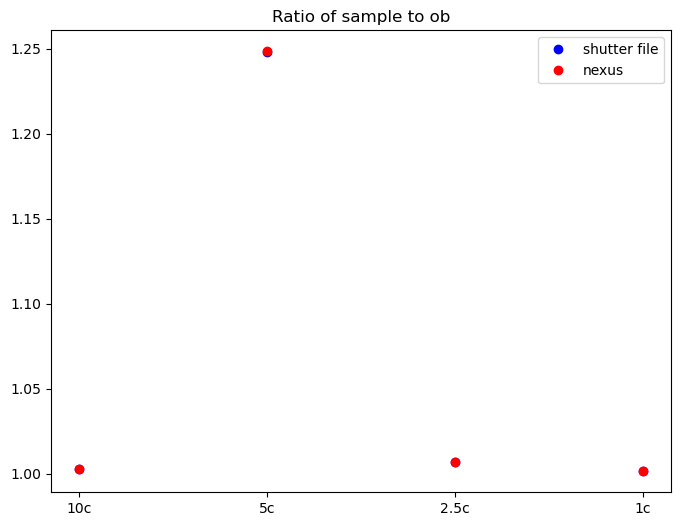

In [89]:
# calculate mean of ratio (shutter file and nexus)
_mean_ratio_shutter_file_10c = np.mean(shutter_dict['sample_10c']['from shutter file'] / shutter_dict['ob_10c']['from shutter file'])
_mean_ratio_shutter_file_5c = np.mean(shutter_dict['sample_5c']['from shutter file'] / shutter_dict['ob_5c']['from shutter file'])
_mean_ratio_shutter_file_2_5c = np.mean(shutter_dict['sample_2_5c']['from shutter file'] / shutter_dict['ob_2_5c']['from shutter file'])
_mean_ratio_shutter_file_1c = np.mean(shutter_dict['sample_1c']['from shutter file'] / shutter_dict['ob_1c']['from shutter file'])

list_mean_ratio_shutter_file = [_mean_ratio_shutter_file_10c,
                                _mean_ratio_shutter_file_5c,
                                _mean_ratio_shutter_file_2_5c,
                                _mean_ratio_shutter_file_1c]

_mean_ratio_nexus_10c = shutter_dict['sample_10c']['from_nexus'] / shutter_dict['ob_10c']['from_nexus']
_mean_ratio_nexus_5c = shutter_dict['sample_5c']['from_nexus'] / shutter_dict['ob_5c']['from_nexus']
_mean_ratio_nexus_2_5c = shutter_dict['sample_2_5c']['from_nexus'] / shutter_dict['ob_2_5c']['from_nexus']
_mean_ratio_nexus_1c = shutter_dict['sample_1c']['from_nexus'] / shutter_dict['ob_1c']['from_nexus']

list_mean_ratio_nexus = [_mean_ratio_nexus_10c,
                        _mean_ratio_nexus_5c,
                        _mean_ratio_nexus_2_5c,
                        _mean_ratio_nexus_1c]

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.plot(list_mean_ratio_shutter_file, 'o', label='shutter file', color='blue')
ax.plot(list_mean_ratio_nexus, 'o', label='nexus', color='red')
ax.set_xticks(range(4))
ax.set_xticklabels(['10c', '5c', '2.5c', '1c'])
ax.set_title('Ratio of sample to ob')
ax.legend()



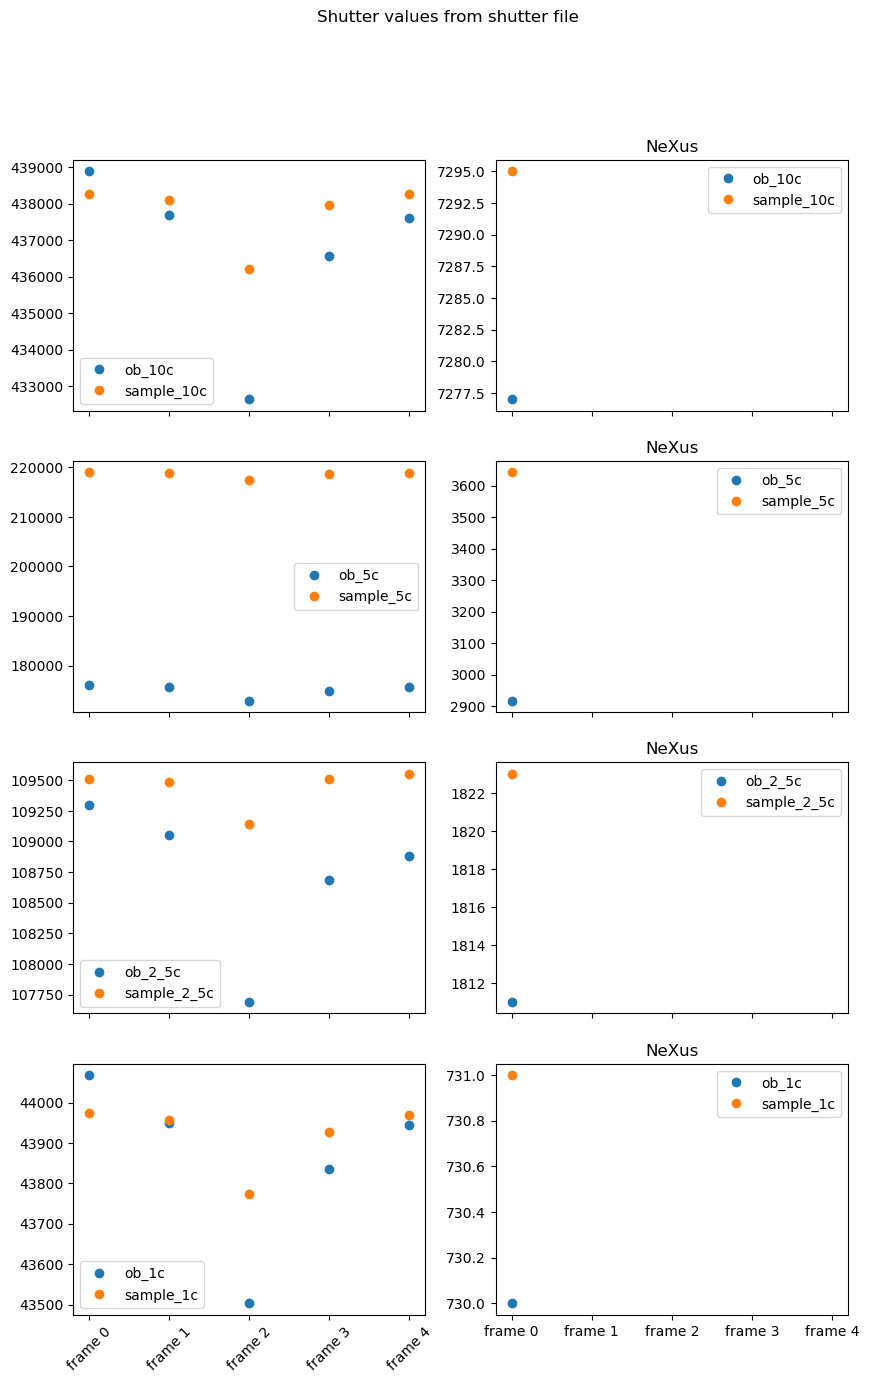

In [ ]:
# compare the values

fig, ax = plt.subplots(4, 2, figsize=(10, 15), sharex=True)
fig.suptitle("Shutter values from shutter file")

for _index, key in enumerate(shutter_dict.keys()):   
   
    if key.endswith('_10c'):
        index = 0
    elif key == 'sample_5c' or key == 'ob_5c':
        index = 1
    elif key.endswith('2_5c'):
        index = 2
    elif key.endswith('_1c'):
        index = 3
    ax[index, 0].plot(shutter_dict[key]['from shutter file'], 'o', label=key)
    ax[index, 0].set_xticks(np.arange(0, len(shutter_dict[key]['from shutter file']), 1))
    ax[index, 0].set_xticklabels(["frame 0", "frame 1", "frame 2", "frame 3", "frame 4"], rotation=45)
    ax[index, 0].legend()
    
    mean_shutter = np.mean(shutter_dict[key]['from shutter file'])
    
    ax[index, 1].plot(0, shutter_dict[key]['from_nexus'], 'o', label=key)
    ax[index, 1].set_title("NeXus")
    ax[index, 1].legend()
    